In [1]:
import os
import numpy as np # for linear algebra related tasks
import pandas as pd # for immporting data and data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 0. DATA COLLECTION

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/insurance/insurance.csv


In [3]:
# imporing the dataset as a dataframe into a variable "rdf" which basically means raw dataframe.
rdf = pd.read_csv("/kaggle/input/insurance/insurance.csv")

In [4]:
rdf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 1.DATA ANALYSIS

## 1.1.BASIC DATA ANALYSIS

In [5]:
# number of rows and columns:
rdf.shape

(1338, 7)

In [6]:
#info about the dataset:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#checking for null values:
rdf.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### INFERENCES:
1. The data contains 7 insurance related parameters(features) for 1338 people(data points).
2. There are no null values in any of the columns.
3. There are 4 numeric features (age, children, bmi, charges); 3 categorical features (sex,smoker,religion).

## 1.2.DESCRIPTIVE ANALYSIS

In [8]:
#describing the dataset:
rdf.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 1.2.1.UNIVARIATE ANALYSIS

<Figure size 432x432 with 0 Axes>

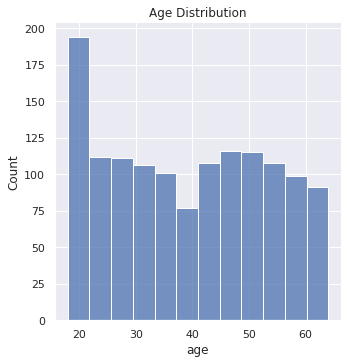

In [9]:
# analysis of "age" column
sns.set()
plt.figure(figsize=(6,6))
sns.displot(rdf['age'])
plt.title("Age Distribution")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


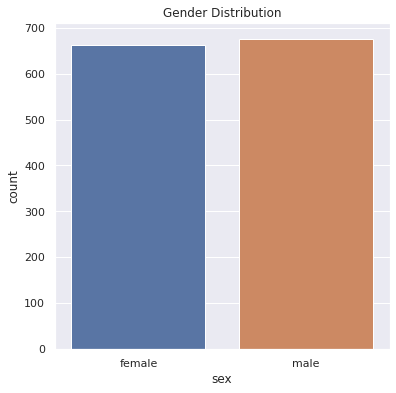

male      676
female    662
Name: sex, dtype: int64


In [10]:
# analysis of "sex" column
plt.figure(figsize=(6,6))
sns.countplot(rdf['sex'])
plt.title("Gender Distribution")
plt.show()

print(rdf["sex"].value_counts())

<Figure size 432x432 with 0 Axes>

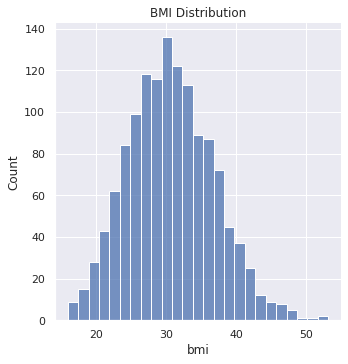

In [11]:
# analysis of "bmi" column
sns.set()
plt.figure(figsize=(6,6))
sns.displot(rdf['bmi'])
plt.title("BMI Distribution")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


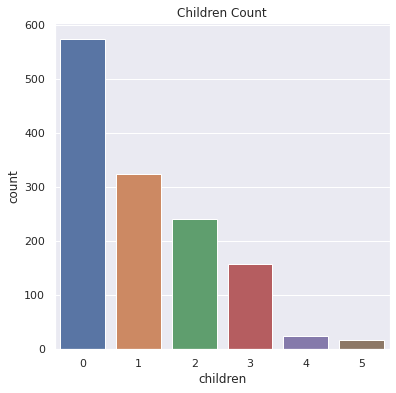

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [12]:
# analysis of "children" column
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(rdf['children'])
plt.title("Children Count")
plt.show()

print(rdf["children"].value_counts())

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


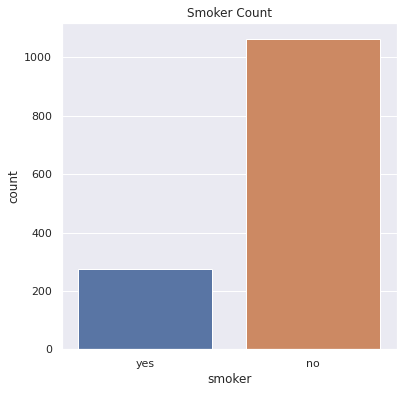

no     1064
yes     274
Name: smoker, dtype: int64


In [13]:
# analysis of "smoker" column
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(rdf['smoker'])
plt.title("Smoker Count")
plt.show()

print(rdf["smoker"].value_counts())

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


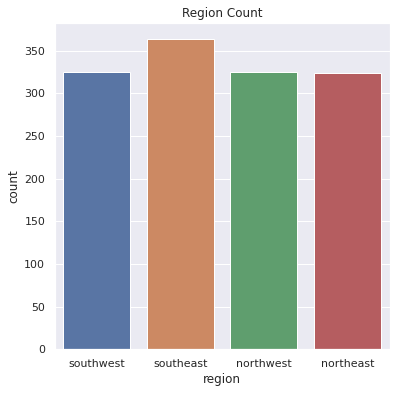

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [14]:
# analysis of "region" column
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(rdf['region'])
plt.title("Region Count")
plt.show()

print(rdf["region"].value_counts())

<Figure size 432x432 with 0 Axes>

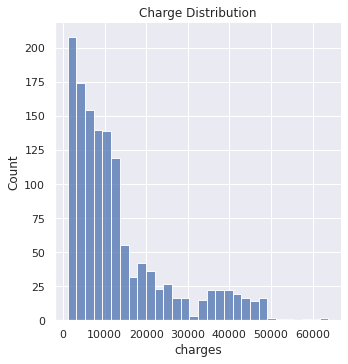

In [15]:
# analysis of "charges" column
sns.set()
plt.figure(figsize=(6,6))
sns.displot(rdf['charges'])
plt.title("Charge Distribution")
plt.show()

### INSIGHTS
1. <b>Age Distribution</b>
* Most people are around age 20-24.
* No. of people around age 24-64 is same.
2. <b>Age</b>:
* No. of males and females is almost same with males on the higher side.
3. <b>BMI</b>:
* BMI has a normal distribution.
* Maximum people have BMI around 30.
* The normal BMI is : 18.5 to 24.9.
* Therefore,Majority of poeple are overweight. 
4. <b>Children</b>:
* Maximum people have no children.
5. <b>Smoker</b>:
* Maximum people are smokers.
6. <b>Region</b>:
* Almost same number of people are present fromm each region with Southwest having a little more people.
7. <b>Charges Distribution</b>


# 2. DATA PREPROCESSING

## 2.1.ENCODING CATEGORICAL FEATURES

In [16]:
rdf_encoded = rdf.copy()

#encoding "sex" column:
rdf_encoded.replace({'sex':{'male':0, 'female':1}},inplace = True)

#encoding "smoker" column:
rdf_encoded.replace({'smoker':{'yes':0, 'no':1}},inplace = True)

#encoding "region" column:
rdf_encoded.replace({'region':{'southeast':0,'northwest':1,'southwest':2,'northeast':3,}},inplace = True)

In [17]:
rdf_encoded.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,2,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,1,21984.47061
4,32,0,28.880,0,1,1,3866.85520


## 2.2. Feature-Target Split

In [18]:
X = rdf_encoded.drop(columns='charges',axis=1)
y = rdf_encoded['charges']

In [19]:
print(X.head())

   age  sex     bmi  children  smoker  region
0   19    1  27.900         0       0       2
1   18    0  33.770         1       1       0
2   28    0  33.000         3       1       0
3   33    0  22.705         0       1       1
4   32    0  28.880         0       1       1


In [20]:
print(y.head())

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


## 2.3. Train-Test-Split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)
print("X_train_shape:", X_train.shape)
print("X_test_shape:", X_test.shape)
print("y_train_shape:", y_train.shape)
print("y_test_shape:", y_test.shape)

X_train_shape: (1070, 6)
X_test_shape: (268, 6)
y_train_shape: (1070,)
y_test_shape: (268,)


## 3.Model Training and Evaluation

## 3.1.Model Training

In [22]:
#initializing the model
model = LinearRegression()

In [23]:
#fitting the data into the model
model.fit(X_train,y_train)

LinearRegression()

## 3.2.Model Evaluation

In [24]:
#evaluating the predicted values for the training set
pred_train = model.predict(X_train)

In [25]:
# R2Score for training data:
r2s_train = metrics.r2_score(y_train, pred_train)
print("R2Score:", r2s_train)

R2Score: 0.7513870264571597


In [26]:
#evaluating the predicted values for the test set
pred_test = model.predict(X_test)

In [27]:
# R2Score for test data:
r2s_test = metrics.r2_score(y_test, pred_test)
print("R-squared value:", r2s_test)

R-squared value: 0.7441422677793177


# 4. Predictive System and Model Pickling

## 4.1.Predictive System

In [28]:
input_data = (31,1,25.74,0,1,0)

#to numpy array and reshaping
numpy_input = np.asarray(input_data)
proper_input = numpy_input.reshape(1,-1)

prediction = model.predict(proper_input)
print('Your medican insurance will cost you around: $', prediction[0])


Your medican insurance will cost you around: $ 3834.635087252089


## 4.2.Model Pickling

In [29]:
import pickle

In [30]:
filename = "trained_model.sav"
pickle.dump(model, open(filename, 'wb'))

## 4.3.Model Validation

In [31]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [32]:
input_data = (31,1,25.74,0,1,0)

#to numpy array and reshaping
numpy_input = np.asarray(input_data)
proper_input = numpy_input.reshape(1,-1)

prediction = loaded_model.predict(proper_input)
print('Your medican insurance will cost you around: $', prediction[0])

Your medican insurance will cost you around: $ 3834.635087252089
